Explore the traning data set

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
train_data= pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

In [20]:
train_data.info()
#test_df.info() Nan

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


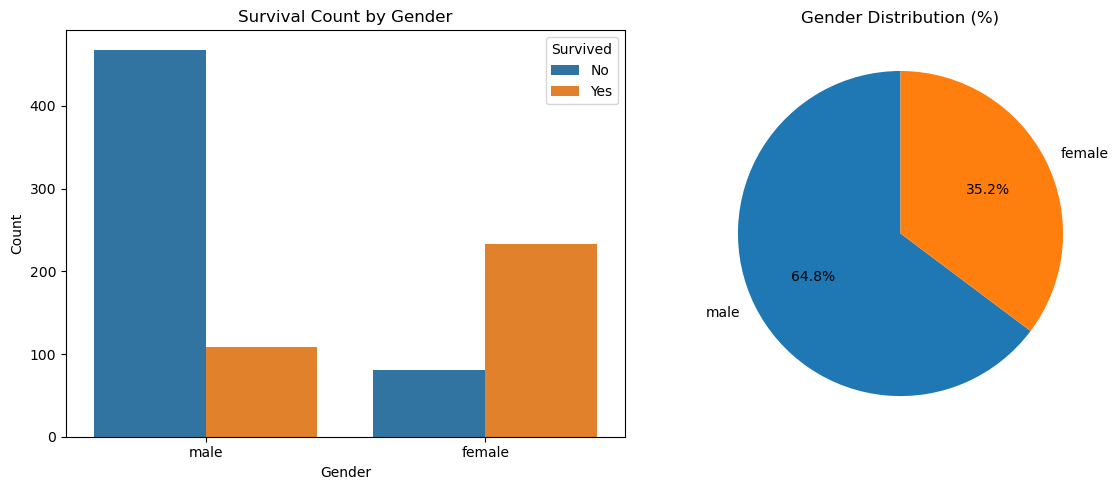

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 🔹 Plot 1: Survival count by Sex
sns.countplot(x='Sex', hue='Survived', data=train_data, ax=axes[0])
axes[0].set_title("Survival Count by Gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Count")
axes[0].legend(title="Survived", labels=["No", "Yes"])

# 🔹 Plot 2: Percentage of Male vs Female
gender_pct = train_data['Sex'].value_counts(normalize=True) * 100

axes[1].pie(
    gender_pct,
    labels=gender_pct.index,
    autopct='%1.1f%%',
    startangle=90
)
axes[1].set_title("Gender Distribution (%)")

plt.tight_layout()
plt.show()